In [119]:
# Importing pandas and numpy to work with the data and sklearn for 
# building models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [121]:
# 1. Loading the data from the CSV file
df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [123]:
# 2. Quick cleaning keeping only the useful columns and getting rid of rows
# with missing or zero values.
df = df[['budget', 'genres', 'release_date', 'runtime', 'revenue']]
df['budget'].replace(0, pd.NA, inplace=True)
df.dropna(subset=['budget', 'release_date', 'runtime', 'revenue'], inplace=True)


In [125]:
# 3. Creating new and more useful columns.
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
df['genre_main'] = df ['genres'].apply(lambda x: eval(x)[0]['name'] if eval(x) else 'Unknown')

In [127]:
# 4. Using One-Hot encoding to turn text into numbers for the model.
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
genre_encoded = encoder.fit_transform(df[['genre_main']])
X = pd.concat([
    df[['budget', 'runtime', 'release_year']].reset_index(drop=True),
    pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out())
], axis = 1)
y = df['revenue']
df.head()
genre_df = pd.DataFrame(genre_encoded, columns = encoder.get_feature_names_out())
genre_df.head()

,genre_main_Action,genre_main_Adventure,genre_main_Animation,genre_main_Comedy,genre_main_Crime,genre_main_Documentary,genre_main_Drama,genre_main_Family,genre_main_Fantasy,genre_main_Foreign,...,genre_main_Horror,genre_main_Music,genre_main_Mystery,genre_main_Romance,genre_main_Science Fiction,genre_main_TV Movie,genre_main_Thriller,genre_main_Unknown,genre_main_War,genre_main_Western
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
#5. Train/test splitting the data into sets
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state = 42)

In [15]:
#6. Train a model to predict revenue
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
#7. Evaluating how the model did.
preds = model.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=False)
print (f'RMSE: ${rmse:,.0f}')

RMSE: $139,369,589


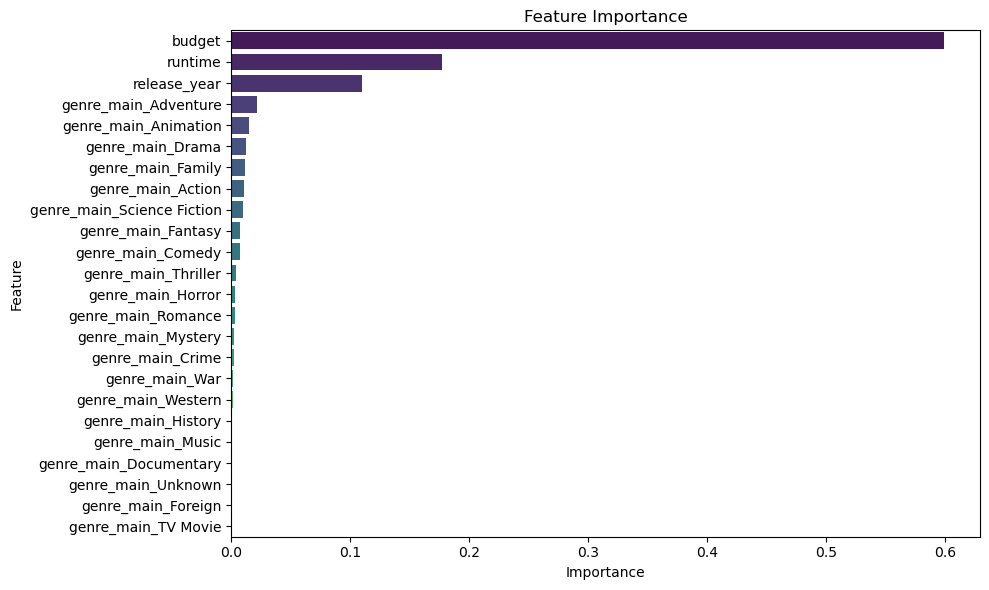

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Getting Metric importances
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [20]:
# Deciding what Counts as a "Hit" Movie
df['hit'] = df['revenue'].apply(lambda x: 1 if x > 100_000_000 else 0)
y_class = df['hit']

In [91]:
# Training a model to predict if a movie will be a hit or not.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87       515
           1       0.75      0.59      0.66       238

    accuracy                           0.81       753
   macro avg       0.79      0.75      0.77       753
weighted avg       0.81      0.81      0.80       753



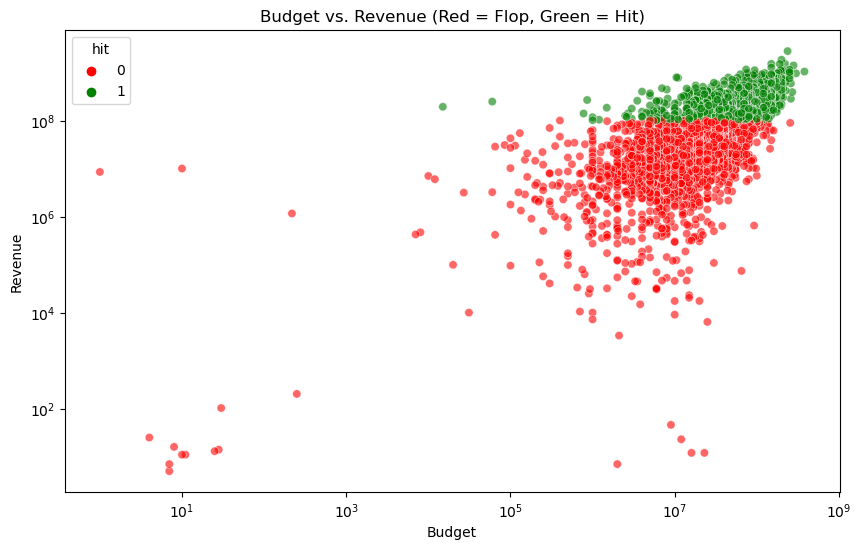

In [93]:
# Making a Budget versus Revenue Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', hue='hit', palette=['red', 'green'], alpha=0.6)
plt.title('Budget vs. Revenue (Red = Flop, Green = Hit)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

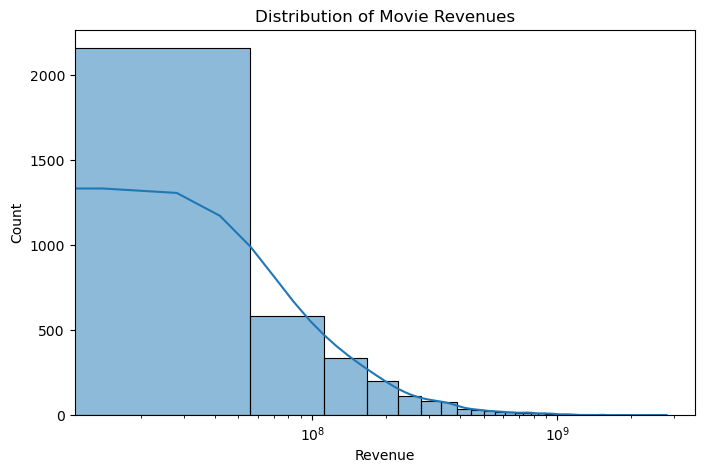

In [27]:
# Showing the Revenue Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['revenue'], bins=50, kde=True)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.xscale('log')  # Log scale to manage large values
plt.show()

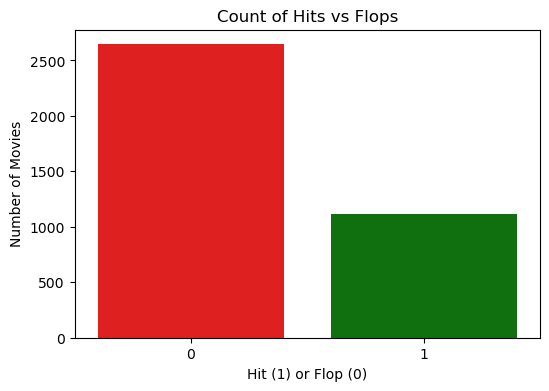

In [29]:
# Showing a Count of Hit Movies Versus Flops
plt.figure(figsize=(6, 4))
sns.countplot(x='hit', data=df, palette=['red', 'green'])
plt.title('Count of Hits vs Flops')
plt.xlabel('Hit (1) or Flop (0)')
plt.ylabel('Number of Movies')
plt.show()

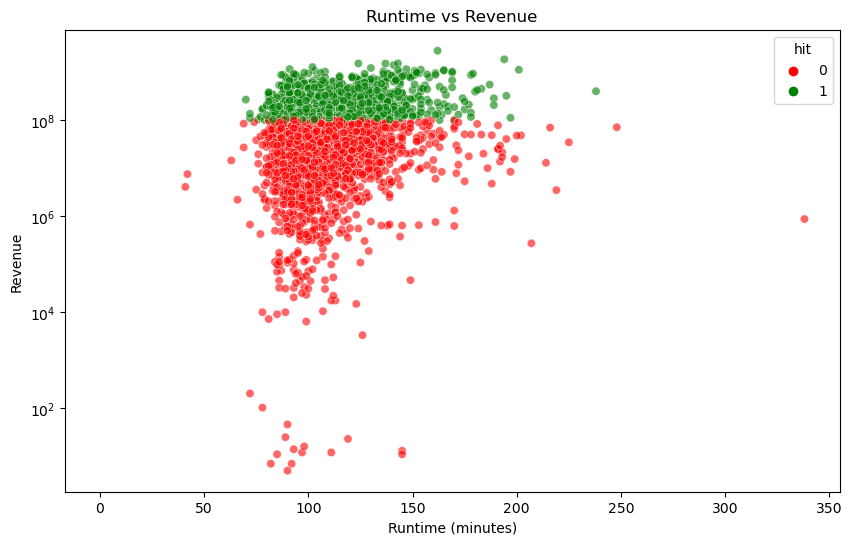

In [31]:
# Showing Runtime against Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='runtime', y='revenue', hue='hit', palette=['red', 'green'], alpha=0.6)
plt.title('Runtime vs Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue')
plt.yscale('log')
plt.show()

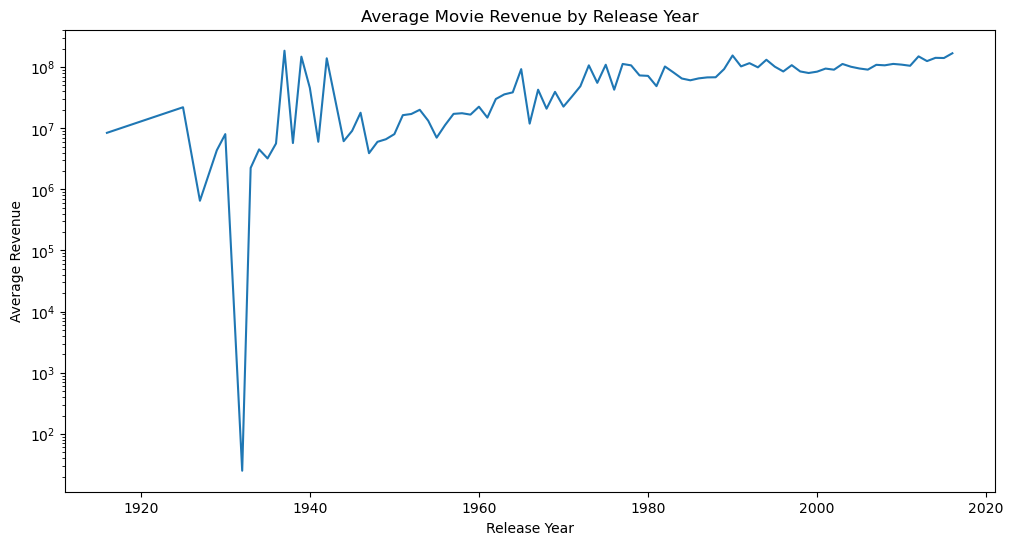

In [33]:
#Showing Revenue by release year
avg_revenue_year = df.groupby('release_year')['revenue'].mean()

plt.figure(figsize=(12, 6))
avg_revenue_year.plot()
plt.title('Average Movie Revenue by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.yscale('log')
plt.show()

In [57]:
# Checking to see if Linear regression is better than Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Define regression target
y = df['revenue']

# Split data for regression
from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_r, y_train_r)

# Predict
lr_preds = lr_model.predict(X_test_r)

# Evaluate
lr_rmse = mean_squared_error(y_test_r, lr_preds, squared=False)
lr_r2 = r2_score(y_test_r, lr_preds)

print(f"Linear Regression RMSE: ${lr_rmse:,.0f}, R squared: {lr_r2:.3f}")

Linear Regression RMSE: $142,944,487, R squared: 0.529


In [73]:
# Predict using your existing Random Forest model
rf_preds = model.predict(X_test_r)

# Evaluate Random Forest
rf_rmse = mean_squared_error(y_test_r, rf_preds, squared=False)
rf_r2 = r2_score(y_test_r, rf_preds)

print(f"Random Forest RMSE: ${rf_rmse:,.0f}, R squared: {rf_r2:.3f}")

Random Forest RMSE: $139,369,589, R squared: 0.552


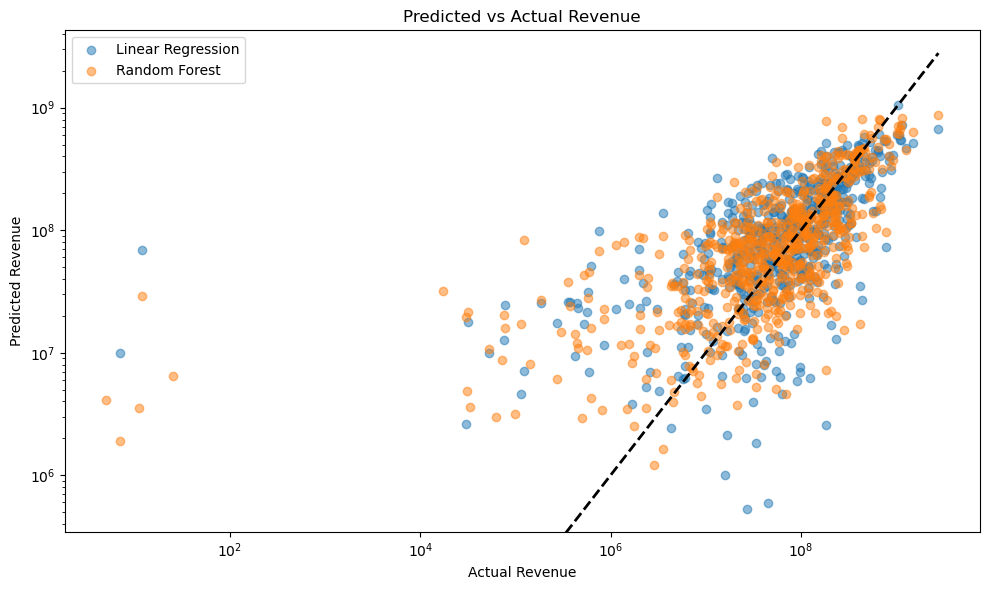

In [79]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted for Linear Regression
plt.scatter(y_test_r, lr_preds, label='Linear Regression', alpha=0.5)

# Plot actual vs predicted for Random Forest
plt.scatter(y_test_r, rf_preds, label='Random Forest', alpha=0.5)

# Line for perfect prediction
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'k--', lw=2)

plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Predicted vs Actual Revenue')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()